In [128]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [194]:
amazon_url = "https://www.amazon.in/s?k=phones"

In [195]:
# user - agent tells that you are trying to access this website and you are a genuine user by identifying your browser information
header = ({'user-agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/113.0.0.0 Safari/537.36', 'Accept-Language' : 'en-US, en;q=0.5'}) 

In [196]:
webpage = requests.get(url = amazon_url, headers=header)
print(webpage)

<Response [200]>


In [197]:
webpage.content

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n<!-- sp:end-feature:head-start -->\n<!-- sp:feature:csm:head-open-part1 -->\n\n<script type=\'text/javascript\'>var ue_t0=ue_t0||+new Date();</script>\n<!-- sp:end-feature:csm:head-open-part1 -->\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n<!-- sp:end-feature:cs-optimization -->\n<!-- sp:feature:csm:head-open-part2 -->\n<script type=\'text/javascript\'>\nwindow.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;\nif (window.ue_ihb === 1) {\n\nvar ue_csm = window,\n    ue_hob = +new Date();\n(function(d){var e=d.ue=d.ue||{},f=Date.now||function()

In [198]:
print(type(webpage.content))

<class 'bytes'>


In [199]:
soup = BeautifulSoup(webpage.content,'html.parser')
soup

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func

In [200]:
links = soup.find_all('a', attrs={'class' : 'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})
links

[<a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/sspa/click?ie=UTF8&amp;spc=MTo0NzA3MDk0OTE5ODE3MTcxOjE2ODQ0Nzg2NDQ6c3BfYXRmOjIwMDQxMDE1NzE1Nzk4OjowOjo&amp;url=%2FSamsung-Mystique-Storage-Purchased-Separately%2Fdp%2FB09TWHTBKQ%2Fref%3Dsr_1_1_sspa%3Fkeywords%3Dphones%26qid%3D1684478644%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1" target="_blank"><span class="a-size-medium a-color-base a-text-normal">Samsung Galaxy M33 5G (Mystique Green, 8GB, 128GB Storage) | 6000mAh Battery | Upto 16GB RAM with RAM Plus | Without Charger</span> </a>,
 <a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/sspa/click?ie=UTF8&amp;spc=MTo0NzA3MDk0OTE5ODE3MTcxOjE2ODQ0Nzg2NDQ6c3BfYXRmOjIwMTQ4MTQ3NDY1NDk4OjowOjo&amp;url=%2FSamsung-Galaxy-Silver-128GB-Storage%2Fdp%2FB0BZCSMP95%2Fref%3Dsr_1_2_sspa%3Fkeywords%3Dphones%26qid%3D1684478644%26sr%3D8-2-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1" tar

In [201]:
len(links)

22

In [202]:
links[0].span.text

'Samsung Galaxy M33 5G (Mystique Green, 8GB, 128GB Storage) | 6000mAh Battery | Upto 16GB RAM with RAM Plus | Without Charger'

In [203]:
links[0].get('href')

'/sspa/click?ie=UTF8&spc=MTo0NzA3MDk0OTE5ODE3MTcxOjE2ODQ0Nzg2NDQ6c3BfYXRmOjIwMDQxMDE1NzE1Nzk4OjowOjo&url=%2FSamsung-Mystique-Storage-Purchased-Separately%2Fdp%2FB09TWHTBKQ%2Fref%3Dsr_1_1_sspa%3Fkeywords%3Dphones%26qid%3D1684478644%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1'

In [204]:
product_link = "https://amazon.in" + links[0].get('href')
product_link

'https://amazon.in/sspa/click?ie=UTF8&spc=MTo0NzA3MDk0OTE5ODE3MTcxOjE2ODQ0Nzg2NDQ6c3BfYXRmOjIwMDQxMDE1NzE1Nzk4OjowOjo&url=%2FSamsung-Mystique-Storage-Purchased-Separately%2Fdp%2FB09TWHTBKQ%2Fref%3Dsr_1_1_sspa%3Fkeywords%3Dphones%26qid%3D1684478644%26sr%3D8-1-spons%26sp_csd%3Dd2lkZ2V0TmFtZT1zcF9hdGY%26psc%3D1'

In [205]:
product_webpage = requests.get(url=product_link, headers=header)
product_webpage

<Response [200]>

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func
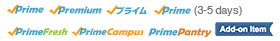
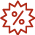

In [206]:
product_soup = BeautifulSoup(product_webpage.content,'html.parser')
product_soup

In [207]:
product_soup.find('span',attrs={'id' : "productTitle"}).text.strip()

'Samsung Galaxy M33 5G (Mystique Green, 8GB, 128GB Storage) | 6000mAh Battery | Upto 16GB RAM with RAM Plus | Without Charger'

In [208]:
product_soup.find('span',attrs={'class' : 'a-size-medium product-title-word-break product-title-resize'})

<span class="a-size-medium product-title-word-break product-title-resize" id="productTitle">        Samsung Galaxy M33 5G (Mystique Green, 8GB, 128GB Storage) | 6000mAh Battery | Upto 16GB RAM with RAM Plus | Without Charger       </span>

In [209]:
product_soup.find('span',attrs={'class' : "a-offscreen"}).text

'₹16,999.00'

In [210]:
product_soup.find('span',attrs={'class' : 'a-size-large a-color-price savingPriceOverride aok-align-center reinventPriceSavingsPercentageMargin savingsPercentage'}).text

'-35%'

In [211]:
product_soup.find('div',attrs={'id' : 'averageCustomerReviews'}).find('span',attrs={'class' : 'a-size-base a-color-base'}).text.strip()

'4.1'

In [212]:
product_soup.find('tr',attrs={'class' : 'a-spacing-small po-brand'}).find('span',attrs={'class' : 'a-size-base po-break-word'}).text

'Samsung'

In [213]:
product_soup.find('tr', attrs={'class':'a-spacing-small po-model_name'}).find('span',attrs={'class':'a-size-base po-break-word'}).text

'Samsung Galaxy M33 5G'

In [174]:
product_soup.find('tr',attrs={'class':'a-spacing-small po-operating_system'}).find('span',attrs={'class':'a-size-base po-break-word'}).text

'Android 12.0'

In [214]:
product_soup.find('tr',attrs={'class':'a-spacing-small po-cellular_technology'}).find('span',attrs={'class':'a-size-base po-break-word'}).text

'5G'

In [220]:
def get_title(soup):
    try:
        title = soup.find("span",attrs={"id" : "productTitle"})
        title_value = title.text
        title_string = title_value.strip()
    except AttributeError:
        title_string = ""
    print(title_string)
    return title_string

def get_brand(soup):
    try:
        brand = soup.find('tr',attrs={'class' : 'a-spacing-small po-brand'}).find('span',attrs={'class' : 'a-size-base po-break-word'})
        brand_value = brand.text
        brand_string = brand_value.strip()
    except AttributeError:
        brand_string = ""
    return brand_string

def get_model(soup):
    try:
        model = soup.find('tr', attrs={'class':'a-spacing-small po-model_name'}).find('span',attrs={'class':'a-size-base po-break-word'})
        model_value = model.text
        model_string = model_value.strip()
    except AttributeError:
        model_string = ""
    return model_string

def get_price(soup):
    try:
        price = soup.find('span',attrs={'class' : 'a-offscreen'})
        price_value = price.text
        price_string = price_value.strip()
    except AttributeError:
        price_string = ""
    return price_string

def get_os(soup):
    try:
        os = soup.find('tr',attrs={'class':'a-spacing-small po-operating_system'}).find('span',attrs={'class':'a-size-base po-break-word'})
        os_value = os.text
        os_string = os_value.strip()
    except AttributeError:
        os_string = ""
    return os_string

def get_cellular(soup):
    try:
        cellular = soup.find('tr',attrs={'class':'a-spacing-small po-cellular_technology'}).find('span',attrs={'class':'a-size-base po-break-word'})
        cellular_value = cellular.text
        cellular_string = cellular_value.strip()
    except AttributeError:
        cellular_string = ""
    return cellular_string

In [226]:
productlist = []*6
for link in links:
    product = []
    product_link = "https://amazon.in" + link.get('href')
    product_webpage = requests.get(url = product_link,headers=header)
    print(product_webpage)
    product_soup = BeautifulSoup(product_webpage.content,"html.parser")
    product.append(get_title(product_soup))
    product.append(get_brand(product_soup))
    product.append(get_model(product_soup))
    product.append(get_price(product_soup))
    product.append(get_os(product_soup))
    product.append(get_cellular(product_soup))
    productlist.append(product)

<Response [200]>
Samsung Galaxy M33 5G (Mystique Green, 8GB, 128GB Storage) | 6000mAh Battery | Upto 16GB RAM with RAM Plus | Without Charger
<Response [200]>
Samsung Galaxy M14 5G (ICY Silver,4GB,128GB Storage)
<Response [200]>
Samsung Galaxy M04 Dark Blue, 4GB RAM, 128GB Storage | Upto 8GB RAM with RAM Plus | MediaTek Helio P35 Octa-core Processor | 5000 mAh Battery | 13MP Dual Camera
<Response [200]>
realme narzo 50 (Speed Black, 6GB RAM+128GB Storage) Helio G96 Processor | 50MP AI Triple Camera | 120Hz Ultra Smooth Display
<Response [200]>
Nokia C12 Android 12 (Go Edition) Smartphone, All-Day Battery, 4GB RAM (2GB RAM + 2GB Virtual RAM) + 64GB Capacity | Light Mint
<Response [200]>
Redmi Note 12 5G Mystique Blue 4GB RAM 128GB ROM | 1st Phone with 120Hz Super AMOLED and Snapdragon® 4 Gen 1 | 48MP AI Triple Camera
<Response [200]>
Samsung Galaxy M04 Light Green, 4GB RAM, 64GB Storage | Upto 8GB RAM with RAM Plus | MediaTek Helio P35 Octa-core Processor | 5000 mAh Battery | 13MP Dual 

In [159]:
print(productlist)

[['Samsung Galaxy M33 5G (Mystique Green, 8GB, 128GB Storage) | 6000mAh Battery | Upto 16GB RAM with RAM Plus | Without Charger', 'Samsung', 'Samsung Galaxy M33 5G', '₹16,999.00', 'Android 12.0', '5G', '-35%'], ['Samsung Galaxy M14 5G (Smoky Teal,4GB,128GB Storage)', 'Samsung', 'Samsung Galaxy M14 5G', '₹13,990.00', 'Android 13.0', '5G', '-22%'], ['Samsung Galaxy M04 Dark Blue, 4GB RAM, 128GB Storage | Upto 8GB RAM with RAM Plus | MediaTek Helio P35 Octa-core Processor | 5000 mAh Battery | 13MP Dual Camera', 'Samsung', 'Samsung M04', '₹8,749.00', 'Android 12.0', '4G', '-35%'], ['realme narzo 50 (Speed Black, 6GB RAM+128GB Storage) Helio G96 Processor | 50MP AI Triple Camera | 120Hz Ultra Smooth Display', 'realme', 'narzo 50', '₹13,499.00', 'Android 11.0', 'LTE', '-25%'], ['Nokia C12 Android 12 (Go Edition) Smartphone, All-Day Battery, 4GB RAM (2GB RAM + 2GB Virtual RAM) + 64GB Capacity | Light Mint', 'Nokia', 'Nokia C12', '₹5,699.00', 'Android 12.0', '2G, 3G, 4G', '-24%'], ['Redmi Note

In [227]:
len(productlist)

22

In [228]:
df = pd.DataFrame(productlist, columns=['title','brand','model','price','os','cellular'])
df

,title,brand,model,price,os,cellular
0,"Samsung Galaxy M33 5G (Mystique Green, 8GB, 12...",Samsung,Samsung Galaxy M33 5G,"₹16,999.00",Android 12.0,5G
1,"Samsung Galaxy M14 5G (ICY Silver,4GB,128GB St...",Samsung,Samsung Galaxy M14 5G,"₹13,990.00",Android 13.0,5G
2,"Samsung Galaxy M04 Dark Blue, 4GB RAM, 128GB S...",Samsung,Samsung M04,"₹8,749.00",Android 12.0,4G
3,"realme narzo 50 (Speed Black, 6GB RAM+128GB St...",realme,narzo 50,"₹13,499.00",Android 11.0,LTE
4,"Nokia C12 Android 12 (Go Edition) Smartphone, ...",Nokia,Nokia C12,"₹5,699.00",Android 12.0,"2G, 3G, 4G"
5,Redmi Note 12 5G Mystique Blue 4GB RAM 128GB R...,Redmi,Redmi Note 12 5G,"₹16,999.00",MIUI 13,5G
6,"Samsung Galaxy M04 Light Green, 4GB RAM, 64GB ...",Samsung,Samsung M04,"₹7,749.00",Android 12.0,4G
7,realme narzo 50i Prime (Mint Green 3GB RAM+32G...,realme,realme narzo 50i Prime,"₹6,899.00",Android 11.0,LTE
8,"realme narzo N55 (Prime Blue, 6GB+128GB) 33W S...",realme,realme narzo N55,"₹12,999.00",Android 13.0,4G
9,"OnePlus 11 5G (Titan Black, 8GB RAM, 128GB Sto...",OnePlus,OnePlus 11 5G,"₹56,999.00",OxygenOS,"5G, 4G LTE"


In [229]:
df.to_csv('phone.csv')